## NAMA : NUR FAIZAH
## NIM  : 09011181722027
## KELAS: SK5A

# RANCANG BANGUN ALAT PENDETEKSI DEHIDRASI DENGAN METODE FUZZY LOGIC
Dehidrasi adalah kondisi dimana tubuh mengalami kehilangan 5% dari total 60% berat badan pada manusia umumnya, dehidrasi sering kali terjadi tanpa disadari oleh sebagian orang, dan beberapa diantaranya sering mengabaikan kondisi tersebut. Alat pendeteksi dehidrasi ini dibangun dengan memanfaatkan sensor LM35 sebagai pendeteksi suhu lingkungan, Termokopel sebagai pendeteksi suhu tubuh dan sensor GSR (Galvanic Skin Resistance) sebagai monitoring tekanan darah, serta arduino sebagai pusat pengendalian sistem. Dehidrasi akan dideteksi dengan membandingkan nilai dari inputan sensor. Data dari setiap sensor akan diolah dengan menggunakan metode fuzzy logic. data yang dihasilkan akan dikirim ke dalam smartphone android yang terhubung secara wireless melalui bluetooth. Dengan adanya alat pendeteksi diharapkan dapat memberikan informasi dan peringatan jika terdeteksi kondisi dehidrasi pada tubuh.

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

#### Input
- Tekanan
    rendah (110-130)
    normal (120-150)
    tinggi (140-160)
- Suhu
    normal (28-30)
    hangat (30-33)
    panas  (33-38)
#### Output
- Dehidrasi
    tidak (1-4)
    iya (6-10)
rentang tekanan, suhu, dan dehidrasi

In [3]:
tekanan = ctrl.Antecedent(np.arange(110,160,1),'tekanan_darah')
tekanan1 = np.arange(110,160,1)

In [4]:
suhu = ctrl.Antecedent(np.arange(28,38,1),'suhu_lingkungan')
suhu1 = np.arange(28,38,1)

In [5]:
dehidrasi = ctrl.Consequent(np.arange(1,10,1),'dehidrasi')
dehidrasi1 = np.arange(1,10,1)

### FUZZIFIKASI

a. Nilai pada Variabel tekanan ada 3, yaitu:
- Tekanan rendah
$$ Tekanan rendah [x] = 
\begin{cases}
    \frac{(110-x)}{(110-1)} & ; 1 \geq  x \geq\ 110 \\
    0 & ; x \leq 110
\end{cases}
$$

- Tekanan normal
$$ Tekanan normal [x] = 
\begin{cases}
    0 & ; x \leq 1\\
    \frac{(x-1)}{(110-1)} & ;1 \leq x \leq\ 110 \\
    \frac{(150-x)}{(150-110)} & ; 110 \leq  x \leq\ 150 \\
    0 & ; x \geq 150
\end{cases}
$$

- Tekanan tinggi
$$ Tekanan tinggi [x] = 
\begin{cases}
    0 & ; x \leq 110\\
    \frac{(x-110)}{(150-110)} & ;110 \leq x \leq\ 150 \\
\end{cases}
$$

b. Nilai pada Variabel suhu ada 3, yaitu:
- Suhu normal
$$ Suhu normal [x] = 
\begin{cases}
    \frac{(28-x)}{(28-1)} & ; 1 \geq  x \geq\ 28 \\
    0 & ; x \leq 28
\end{cases}
$$

- Suhu hangat
$$ Suhu hangat [x] = 
\begin{cases}
    0 & ; x \leq 28\\
    \frac{(x-1)}{(28-1)} & ; 1 \leq x \leq\ 28 \\
    \frac{(36-x)}{(36-28)} & ; 28 \leq  x \leq\ 36 \\
    0 & ; x \geq 28
\end{cases}
$$

- Suhu panas
$$ Suhu panas [x] = 
\begin{cases}
    0 & ; x \leq 36\\
    \frac{(x-28)}{(36-28)} & ; 28 \leq x \leq\ 36 \\
\end{cases}
$$

c. Nilai pada Variabel dehidrasi ada 2, yaitu:
- Non Dehidrasi
$$ Dehidrasi [z] = 
\begin{cases}
    \frac{(10-z)}{(10-1)} & ; 10 \geq  z \geq\ 10 \\
    0 & ; z \leq 0.1
\end{cases}
$$

- Dehidrasi
$$ dehidrasi [z] = 
\begin{cases}
    \frac{(z-1)}{(10-1)} & ;1 \leq z \leq\ 1 \\
    0 & ; z \geq 1\\
\end{cases}
$$

### INPUT

In [7]:
tekanan['rendah'] = fuzz.trapmf(tekanan.universe, [0, 0, 120, 130])
tekanan['normal'] = fuzz.trimf(tekanan.universe, [120, 135, 150])
tekanan['tinggi'] = fuzz.trimf(tekanan.universe, [140, 150, 160])

C:\Users\NurFaizah\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


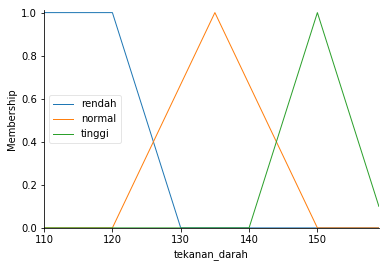

In [8]:
tekanan.view()

In [11]:
suhu['normal'] = fuzz.trapmf(suhu.universe, [0, 0, 30, 32])
suhu['hangat'] = fuzz.trimf(suhu.universe, [30, 33, 36])
suhu['panas'] = fuzz.trimf(suhu.universe, [34, 38, 38])

C:\Users\NurFaizah\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


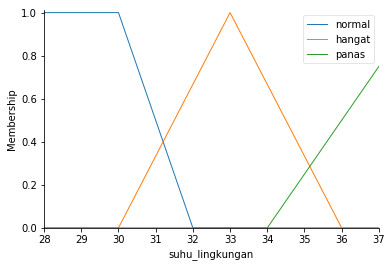

In [12]:
suhu.view()

### OUTPUT

In [17]:
dehidrasi['tidak'] = fuzz.trimf(dehidrasi.universe, [1, 4, 6])
dehidrasi['iya'] = fuzz.trimf(dehidrasi.universe, [4, 7, 10])

C:\Users\NurFaizah\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


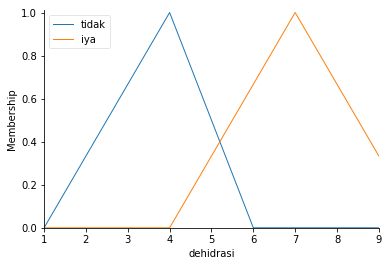

In [18]:
dehidrasi.view()

### Inferencing

berikut akan menggunakan 9 aturan fuzzy yaitu sebagai berikut:

    if tekanan is rendah and suhu is normal then tidak dehidrasi
    if tekanan is rendah and suhu is hangat then dehidrasi
    if tekanan is rendah and suhu is panas then dehidrasi
    if tekanan is normal and suhu is normal then tidak dehidrasi
    if tekanan is normal and suhu is hangat then tidak dehidrasi
    if tekanan is normal and suhu is panas then dehidrasi
    if tekanan is tinggi and suhu is normal then tidak dehidrasi
    if tekanan is tinggi and suhu is hangat then dehidrasi
    if tekanan is tinggi and suhu is panas then dehidrasi

In [19]:
rule1 = ctrl.Rule(tekanan['rendah'] & suhu['normal'], dehidrasi['tidak'])
rule2 = ctrl.Rule(tekanan['rendah'] & suhu['hangat'], dehidrasi['iya'])
rule3 = ctrl.Rule(tekanan['rendah'] & suhu['panas'], dehidrasi['iya'])

rule4 = ctrl.Rule(tekanan['normal'] & suhu['normal'], dehidrasi['tidak'])
rule5 = ctrl.Rule(tekanan['normal'] & suhu['hangat'], dehidrasi['tidak'])
rule6 = ctrl.Rule(tekanan['normal'] & suhu['panas'], dehidrasi['iya'])

rule7 = ctrl.Rule(tekanan['tinggi'] & suhu['normal'], dehidrasi['tidak'])
rule8 = ctrl.Rule(tekanan['tinggi'] & suhu['hangat'], dehidrasi['iya'])
rule9 = ctrl.Rule(tekanan['tinggi'] & suhu['panas'], dehidrasi['iya'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17035c6a90>)

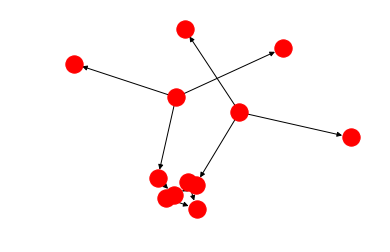

In [20]:
rule1.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1703545a90>)

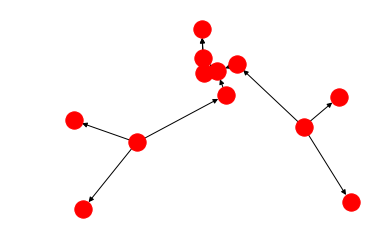

In [21]:
rule2.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17034a6828>)

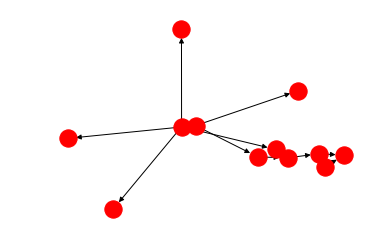

In [22]:
rule3.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17033e8240>)

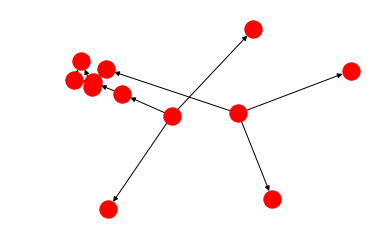

In [23]:
rule4.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1703410208>)

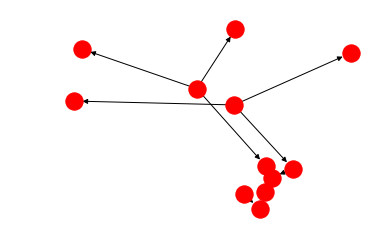

In [24]:
rule5.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x170347e860>)

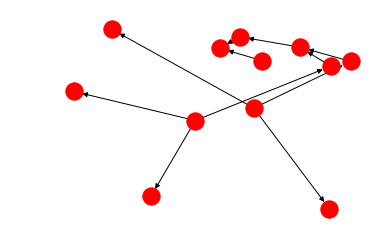

In [25]:
rule6.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17035f9940>)

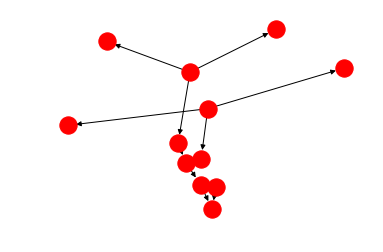

In [26]:
rule7.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x170463d8d0>)

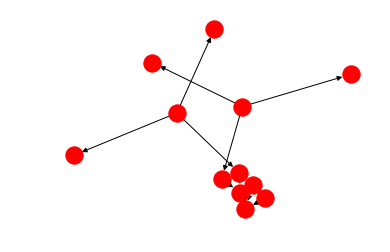

In [27]:
rule8.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17046accc0>)

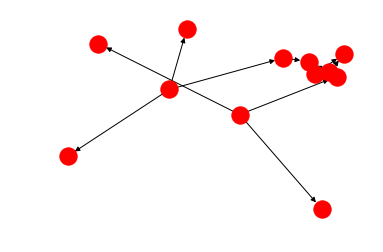

In [28]:
rule9.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x170472e550>)

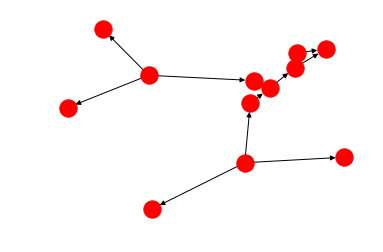

In [29]:
rule1 = ctrl.Rule(tekanan['rendah'] & suhu['normal'], dehidrasi['tidak'])
rule2 = ctrl.Rule(tekanan['rendah'] & suhu['hangat'], dehidrasi['iya'])
rule3 = ctrl.Rule(tekanan['rendah'] & suhu['panas'], dehidrasi['iya'])

rule4 = ctrl.Rule(tekanan['normal'] & suhu['normal'], dehidrasi['tidak'])
rule5 = ctrl.Rule(tekanan['normal'] & suhu['hangat'], dehidrasi['tidak'])
rule6 = ctrl.Rule(tekanan['normal'] & suhu['panas'], dehidrasi['iya'])

rule7 = ctrl.Rule(tekanan['tinggi'] & suhu['normal'], dehidrasi['tidak'])
rule8 = ctrl.Rule(tekanan['tinggi'] & suhu['hangat'], dehidrasi['iya'])
rule9 = ctrl.Rule(tekanan['tinggi'] & suhu['panas'], dehidrasi['iya'])

rule1.view()

### RULE EVALUATION

In [30]:
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])

### DEFUZZIFIKASI

- Merupakan pengubahan output fuzzy yang diperoleh dari mesin inferensi menjadi nilai tegas menggunakan fungsi keanggotaanyang sesuai saat dilakukannya fuzzifikasi.
- Berikut contohnya
  
  Jika seseorang memiliki tekanan darah sebesar 130 dan suhu lingkungan sekitar 32 derajat, apakah dikatakan dehidrasi atau tidak???

In [31]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [57]:
tipping.input['tekanan_darah'] = 130
tipping.input['suhu_lingkungan'] = 32

tipping.compute()

In [58]:
print(tipping.output['dehidrasi'])

3.6388888888888893


C:\Users\NurFaizah\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


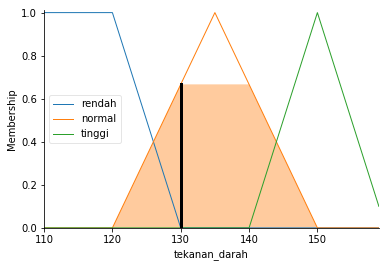

In [59]:
tekanan.view(sim=tipping)

C:\Users\NurFaizah\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


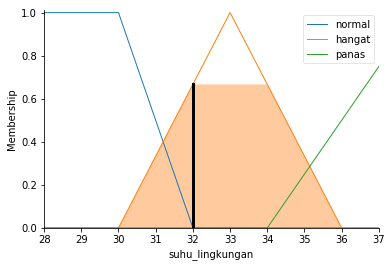

In [60]:
suhu.view(sim=tipping)

C:\Users\NurFaizah\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


3.6388888888888893


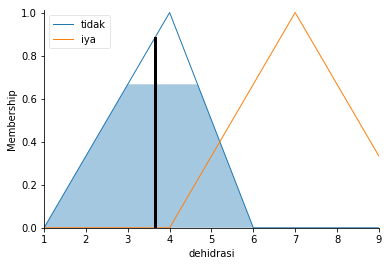

In [61]:
dehidrasi.view(sim=tipping)
print(tipping.output['dehidrasi'])

- tekanan darah menunjukkan bahwa tekanan normal pada angka 130
- suhu lingkungan menunjukkan bahwa dalam keadaan hangat pada angka 32
Jadi jika seseorang memiliki tekanan darah normal dan suhu yang hangat maka pada rule menunjukkan bahwa seseorang tersebut tidak mengalami dehidrasi.

##### Perhitungan manual
- X1 = 2/3.(3+1) = 0,66 . 4 = 2,667
- X2 = 1/2.(2+5) = 0,5 . 8 = 4
- X3 = 5+1/3(6-5) = 5+1/3(1) = 5,33
- A1 = 1/2.2.0,7 = 0,7
- A2 = 2.0,7 = 1,4
- A3 = 1/2.1.0,7 = 0,35


berikut hasil dari outputnya dengan menggunakan perhitungan manual :

$$Z = \frac {X1 \times A1+ X2 \times A2 + X3 \times A3}{ A1 + A2 + A3} $$

$$Z = \frac {(
2,667 \times 0,7 + 4 \times 1,4 + 5,33 \times 0,35}{ 0,7 + 1,4 + 0,35} $$
 
 $$ Z = \frac {1,8669 + 5,6 + 1,8655}{2,45} $$
 $$ Z = 3,809 \, detik $$

Hasil perhitungan output (Dehidrasi) yang didapat dari code phython sebesar 3,638, sedangkan menggunakan perhitungan manual sebesar 3,809 , jadi selisih perhitungan manual dan code phython sebesar 0,171 yaang menghasilkan ketentuan seseorang tersebut tidak mengalami dehidrasi.